# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Step 1 - Write code to Read data from dataset into pandas dataframe

In [58]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [59]:
# Print the first few rows and summary statistics of the dataset
print(diabetes_data.info())
print(diabetes_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1 

### Histograms for data sets

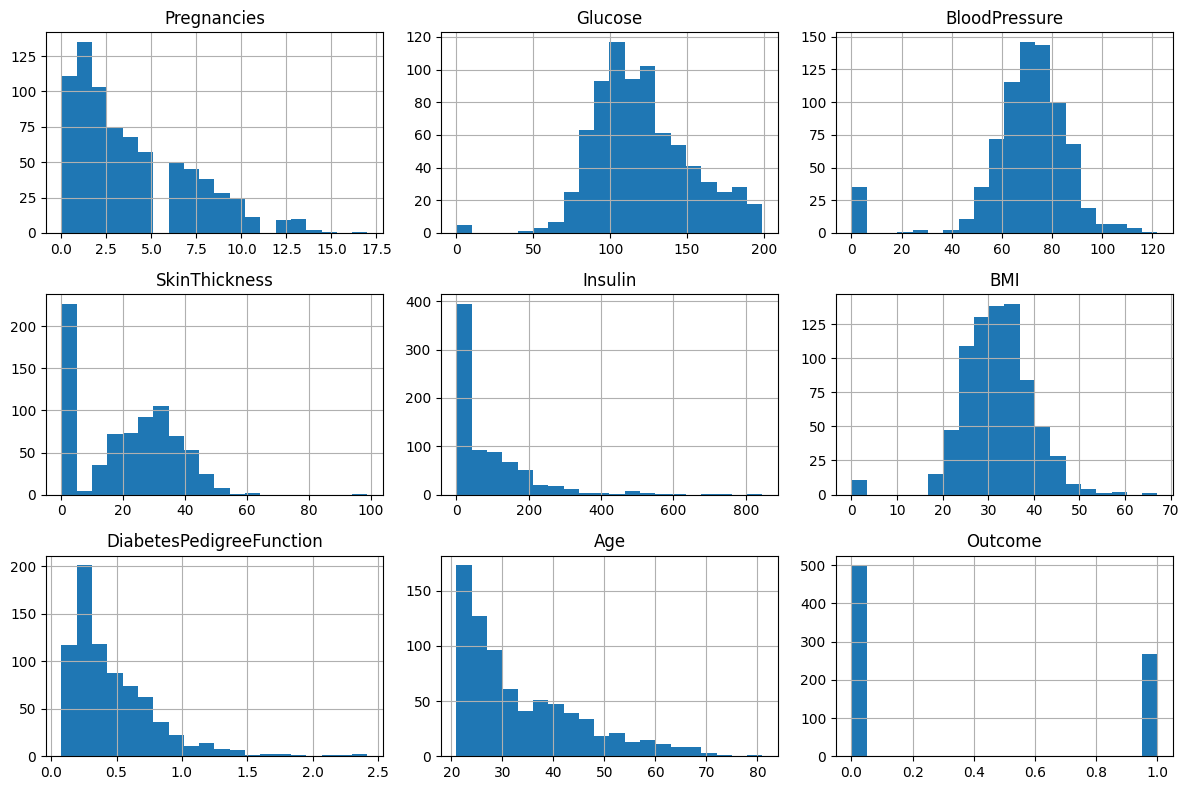

In [60]:
# Histogram for numerical features
diabetes_data.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

### Distribution of Outcome

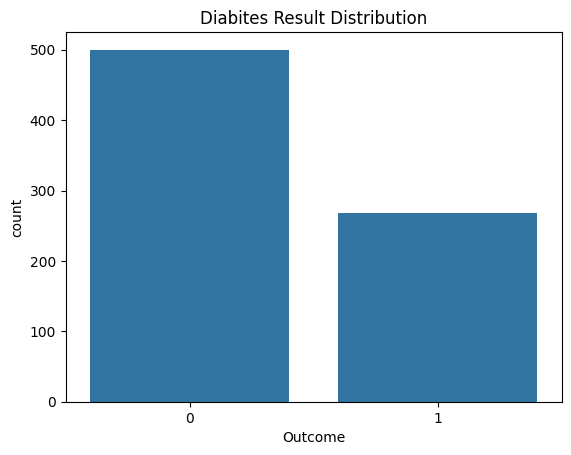

In [61]:
# Countplot for result
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Diabites Result Distribution')
plt.show()

### Create correlation matrix

In [62]:
# Correlation matrix
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


<Axes: >

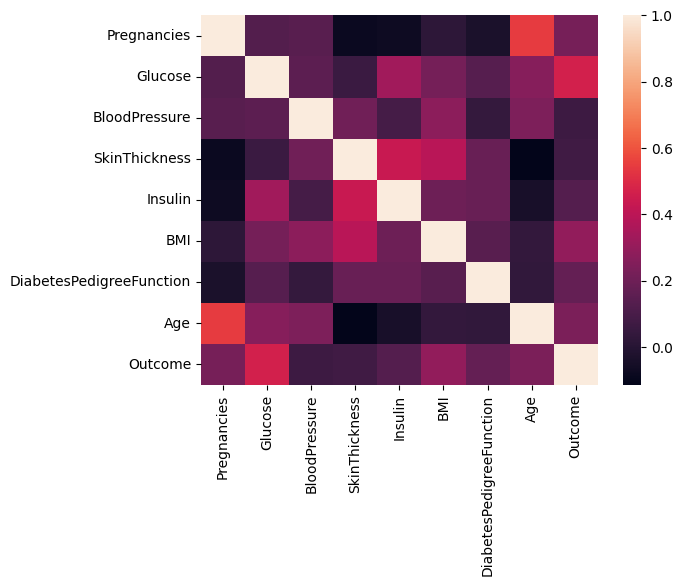

In [63]:
sns.heatmap(diabetes_data.corr())

Step 3 - Write code to remove Pregnancy column 

In [64]:
# Drop the 'Pregnancies' column
diabetes_data = diabetes_data.drop('Pregnancies', axis=1)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [65]:
print(diabetes_data.info())
print(diabetes_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None
(768, 8)


Step 5 - Write code to clean data

In [66]:
# Columns where 0 is likely an invalid value
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
diabetes_data[cols_with_zero_invalid] = diabetes_data[cols_with_zero_invalid].replace(0, np.nan)

# Impute missing values with median (more robust to outliers)
diabetes_data[cols_with_zero_invalid] = diabetes_data[cols_with_zero_invalid].fillna(diabetes_data[cols_with_zero_invalid].median())

# Check for any remaining missing values
print(diabetes_data.isnull().sum())


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [67]:
# Select features
feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[feature_cols]
y = diabetes_data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Step #7: Initialize your model**




In [68]:
# Build a Gaussian Classifier
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [69]:
# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# Classification report
target_names = ['No diabetes', 'Has diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 No diabetes       0.82      0.82      0.82       109
Has diabetes       0.56      0.56      0.56        45

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



Step 9 - Predict using model on test data

In [70]:
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [71]:
# Find accuracy and F1 score
accuray = accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7402597402597403
F1 Score: 0.7402597402597403


Step 11 - Confusion Matrix

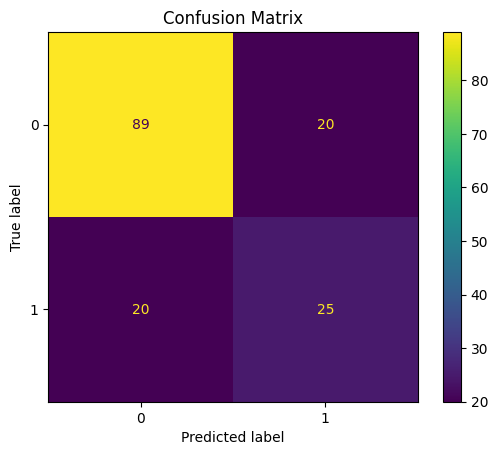

In [72]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

### ROC Curve - Evaluating Classifier Performance

The ROC curve shows the trade-off between sensitivity and specificity for different threshold values.

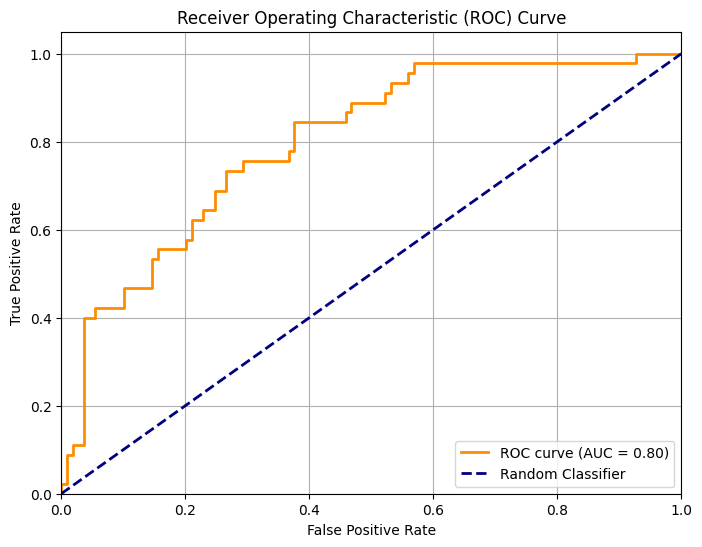

AUC Score: 0.7982


In [73]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

### Feature Distribution by Outcome

Comparing how each feature is distributed between diabetic and non-diabetic patients helps understand what the Naive Bayes classifier learned.

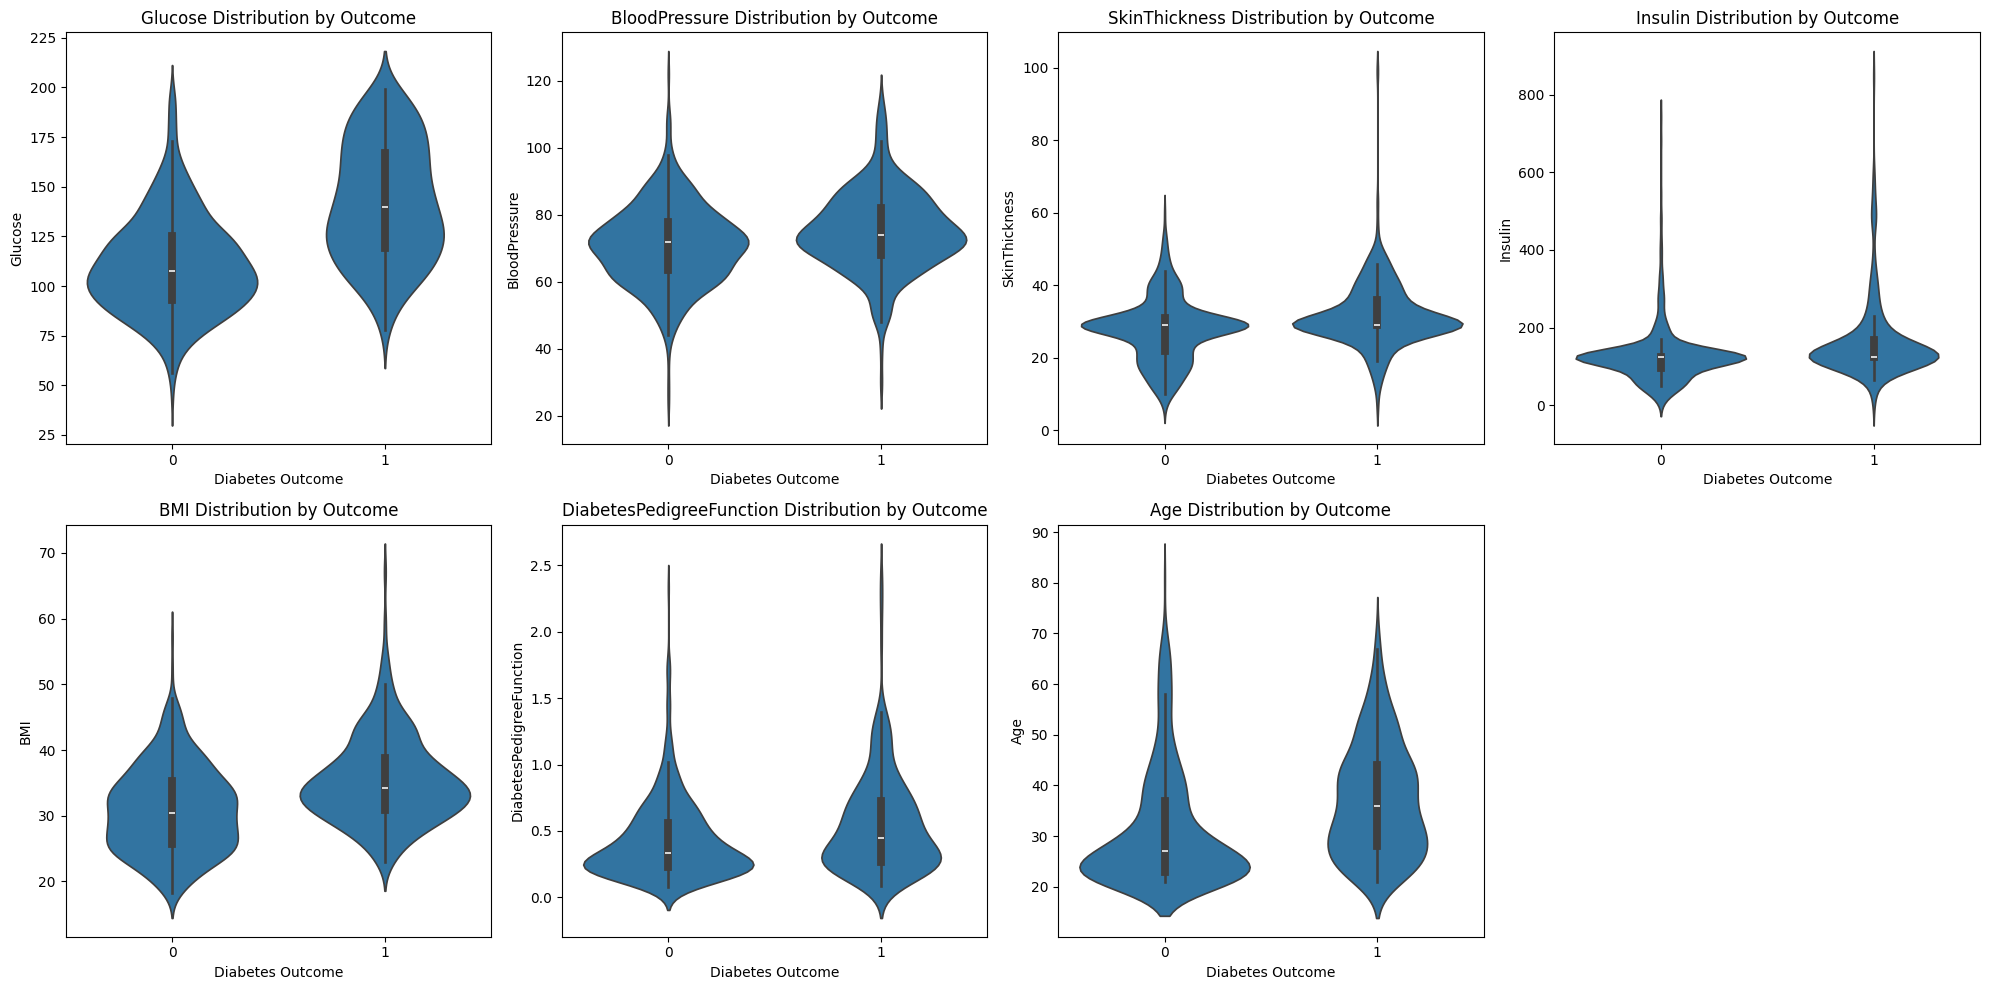

In [74]:
# Feature distribution by outcome
feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(feature_cols):
    # Create violin plot for each feature
    sns.violinplot(data=diabetes_data, x='Outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution by Outcome')
    axes[idx].set_xlabel('Diabetes Outcome')
    
# Remove the extra subplot
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

### Prediction Probability Distribution

This shows how confident the Naive Bayes classifier is in its predictions.

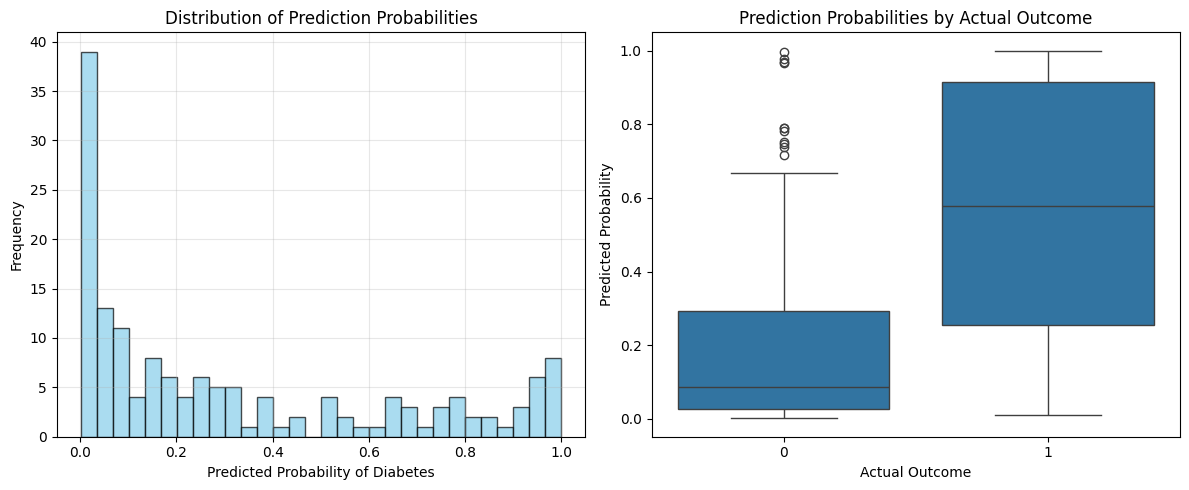

In [75]:
# Plot prediction probability distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram of prediction probabilities
plt.subplot(1, 2, 1)
plt.hist(y_pred_proba, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Diabetes')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Probabilities')
plt.grid(True, alpha=0.3)

# Subplot 2: Box plot by actual outcome
plt.subplot(1, 2, 2)
prob_df = pd.DataFrame({'Actual': y_test, 'Predicted_Prob': y_pred_proba})
sns.boxplot(data=prob_df, x='Actual', y='Predicted_Prob')
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Probability')
plt.title('Prediction Probabilities by Actual Outcome')

plt.tight_layout()
plt.show()

### Feature Analysis for Naive Bayes

While Naive Bayes doesn't provide traditional feature importance, we can analyze the mean and variance of features by class to understand which features are most discriminative.

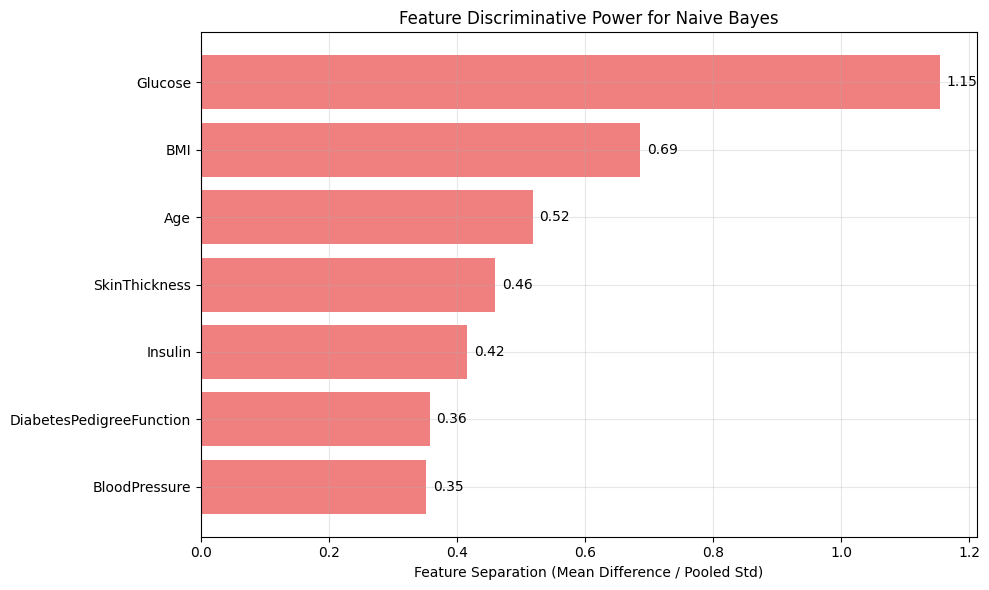

Feature Separation Ranking:
                 Feature  Separation
           BloodPressure       0.352
DiabetesPedigreeFunction       0.358
                 Insulin       0.416
           SkinThickness       0.460
                     Age       0.519
                     BMI       0.687
                 Glucose       1.154


In [76]:
# Analyze feature statistics by class
feature_stats = []
for i, feature in enumerate(feature_cols):
    # Get the original feature values (before scaling)
    original_X = diabetes_data[feature_cols]
    
    class_0_mean = original_X[diabetes_data['Outcome'] == 0][feature].mean()
    class_1_mean = original_X[diabetes_data['Outcome'] == 1][feature].mean()
    class_0_std = original_X[diabetes_data['Outcome'] == 0][feature].std()
    class_1_std = original_X[diabetes_data['Outcome'] == 1][feature].std()
    
    # Calculate separation (difference in means relative to pooled standard deviation)
    pooled_std = np.sqrt((class_0_std**2 + class_1_std**2) / 2)
    separation = abs(class_1_mean - class_0_mean) / pooled_std
    
    feature_stats.append({
        'Feature': feature,
        'No_Diabetes_Mean': class_0_mean,
        'Diabetes_Mean': class_1_mean,
        'Separation': separation
    })

stats_df = pd.DataFrame(feature_stats)
stats_df = stats_df.sort_values('Separation', ascending=True)

# Plot feature separation
plt.figure(figsize=(10, 6))
bars = plt.barh(stats_df['Feature'], stats_df['Separation'], color='lightcoral')
plt.xlabel('Feature Separation (Mean Difference / Pooled Std)')
plt.title('Feature Discriminative Power for Naive Bayes')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print("Feature Separation Ranking:")
print(stats_df[['Feature', 'Separation']].to_string(index=False))

### Cross-Validation Performance

Evaluating model stability across different data splits.

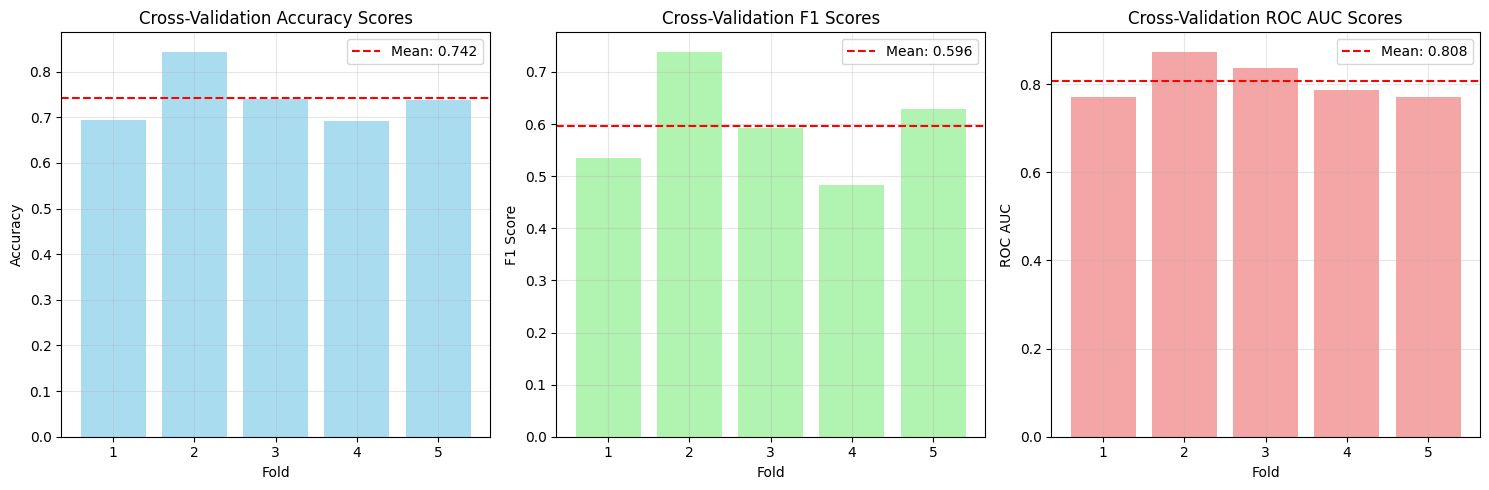

Cross-Validation Results:
Accuracy: 0.7421 (+/- 0.1099)
F1 Score: 0.5958 (+/- 0.1745)
ROC AUC: 0.8078 (+/- 0.0820)


In [77]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Perform cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get all features (scaled)
X_scaled = scaler.fit_transform(diabetes_data[feature_cols])
y = diabetes_data['Outcome']

# Calculate cross-validation scores
cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='f1')
roc_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='roc_auc')

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy scores
axes[0].bar(range(1, 6), cv_scores, color='skyblue', alpha=0.7)
axes[0].axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Cross-Validation Accuracy Scores')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# F1 scores
axes[1].bar(range(1, 6), f1_scores, color='lightgreen', alpha=0.7)
axes[1].axhline(y=f1_scores.mean(), color='red', linestyle='--', label=f'Mean: {f1_scores.mean():.3f}')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('Cross-Validation F1 Scores')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# ROC AUC scores
axes[2].bar(range(1, 6), roc_scores, color='lightcoral', alpha=0.7)
axes[2].axhline(y=roc_scores.mean(), color='red', linestyle='--', label=f'Mean: {roc_scores.mean():.3f}')
axes[2].set_xlabel('Fold')
axes[2].set_ylabel('ROC AUC')
axes[2].set_title('Cross-Validation ROC AUC Scores')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Cross-Validation Results:")
print(f"Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"F1 Score: {f1_scores.mean():.4f} (+/- {f1_scores.std() * 2:.4f})")
print(f"ROC AUC: {roc_scores.mean():.4f} (+/- {roc_scores.std() * 2:.4f})")

### Learning Curve

Shows how model performance changes with training set size.

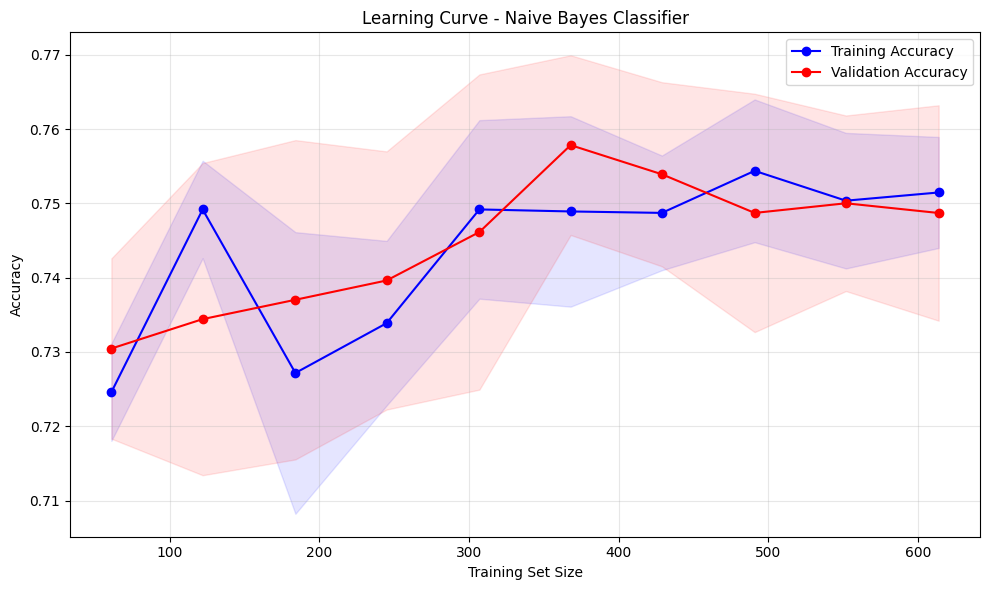

In [78]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_scaled, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Naive Bayes Classifier')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()